<a href="https://colab.research.google.com/github/aashish010h/predictive_modelling_of_california_housing_prices_using_machine_learning_techniques/blob/main/Predictive_Modelling_of_California_Housing_Prices_Using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this part brings in the kaggle tool so we can talk to their website
import kagglehub

# this line actually goes to the internet and downloads the housing data we need
# it saves the path (where the file is) into a variable
camnugent_california_housing_prices_path = kagglehub.dataset_download('camnugent/california-housing-prices')


print('Data source import complete.')

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Data source import complete.


<div style="text-align:center; font-size:30px; border: 2px solid black; border-radius: 5px; padding: 8px; margin-bottom: 10px; background-color:lightblue; font-family: Bold; font-weight: bold; color: white;">
  California Housing Price Prediction  
</div>


<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 3px solid #333333; border-radius: 0 30px 0 0; padding: 10px; margin-bottom: 10px; background-color: #f0f0f0;">
        <div style="text-align:left;">
            <blockquote style="border-left: 5px solid #26C6DA; padding-left: 10px;">
                <span style="font-weight:bold; font-size: 150%; font-family: Open Sans; color:#4f4f4f;">ABOUT DATASET: </span>
                <span style="color:#4f4f4f;font-size: 120%; font-family: Open Sans;">This dataset is used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow'. It contains information from the 1990 California census and serves as an excellent introduction to implementing machine learning algorithms. The dataset includes various features related to housing and demographics within a block in California, making it suitable for teaching the basics of machine learning.</span>
            </blockquote>
            <div style="border: 3px solid #333333; border-radius: 0 20px 0 0; padding: 10px; margin-bottom: 5px; background-color:#ADD8E6;">
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- Longitude:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> A measure of how far west a house is; a higher value is farther west</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- Latitude:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> A measure of how far north a house is; a higher value is farther north</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold;font-size: 120%; font-family: Open Sans; color:#ffffff;">- HousingMedianAge:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Median age of a house within a block; a lower number is a newer building</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- TotalRooms:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Total number of rooms within a block</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold;font-size: 120%; font-family: Open Sans; color:#ffffff;">- TotalBedrooms:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Total number of bedrooms within a block</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- Population:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Total number of people residing within a block</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold;font-size: 120%; font-family: Open Sans; color:#ffffff;">- Households:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Total number of households, a group of people residing within a home unit, for a block</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- MedianIncome:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Median income for households within a block of houses (measured in tens of thousands of US Dollars)</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold;font-size: 120%; font-family: Open Sans; color:#ffffff;">- MedianHouseValue:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Median house value for households within a block (measured in US Dollars)</span>
                </div>
                <div style="margin-bottom: 10px;">
                    <span style="font-weight:bold; font-size: 120%; font-family: Open Sans; color:#ffffff;">- OceanProximity:</span>
                    <span style="color:#ffffff; font-family: Open Sans;"> Location of the house w.r.t ocean/sea</span>
                </div>
            </div>
        </div>
    </div>
</div>


## Import Important Libraries

In [ ]:
# importing the tools and packages we need to handle data and build the models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load data

In [ ]:
# this line tells the computer to open the housing data file so we can use it
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# this just shows us the first few rows of the table so we can check if it loaded properly
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

# Explore data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
# this function looks through the dataset to find any empty (null) spots
def d_null(data):
    # it counts how many missing values are in each column
    d_null = data.isnull().sum()

    # it only shows the columns that actually have missing values (count > 0)
    return d_null[d_null > 0]

# running the function to check our data for holes
d_null(data)

total_bedrooms    207
dtype: int64

Text(0.5, 1.0, 'Data Missing Values')

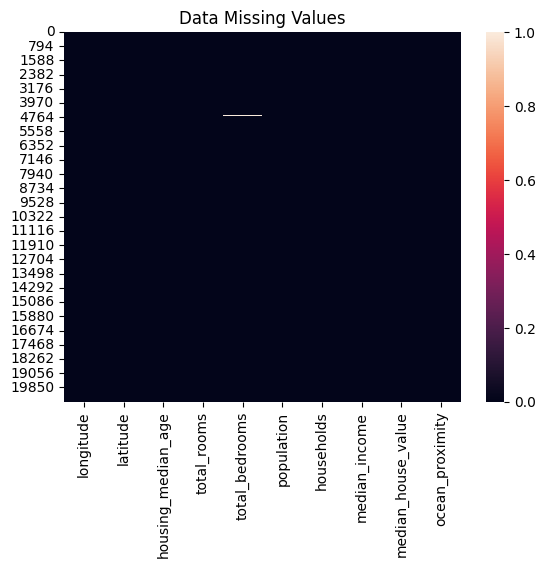

In [ ]:
# this creates a heatmap to show where the missing data is located
# it colors the empty spots differently so we can see if they are grouped together
sns.heatmap(data.isnull())

# adding a title to the chart so we know what it is showing
plt.title('Data Missing Values')

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Data Cleaning

In [ ]:
# this shows us the specific rows where 'total_bedrooms' is empty (NaN)
# it helps us see exactly which data points have missing information
data[data['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [ ]:
# this part finds the empty spots in 'total_bedrooms' and fills them with the median
# the median is the middle number, which is better than average for this data
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [ ]:
# this runs the function we created to show which columns still have missing data
# after the cleaning step, this should return an empty list because the holes are filled
d_null(data)

Series([], dtype: int64)

In [ ]:
# --- START NEW FEATURE ENGINEERING ---

# 1. Rooms per Household: Average size of the home
# we divide total rooms by households to see how big the houses are on average
data["rooms_per_household"] = data["total_rooms"] / data["households"]

# 2. Bedrooms per Room: Bed/Room ratio
# this helps the model see if a house has many small rooms or few large rooms
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]

# 3. Population per Household: Crowd density
# we divide people by houses to see how many people live in one home on average
data["population_per_household"] = data["population"] / data["households"]

# --- END NEW FEATURE ENGINEERING ---

# EDA

In [ ]:
# this loop goes through every column in the dataset one by one
for col in data.columns:
    # it prints the column name and counts how many unique (different) values are in it
    # this helps us see which columns are categories and which are just numbers
    print(col, ':', data[col].nunique())

longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
median_house_value : 3842
ocean_proximity : 5
rooms_per_household : 19392
bedrooms_per_room : 19463
population_per_household : 18841


In [ ]:
# this loop looks at every column in the dataset one by one
for col in data.columns:
    # it prints the column name and shows every unique value found in that column
    # this helps us see the different categories (like "NEAR BAY" or "INLAND")
    # and spot any weird or wrong data points
    print(col, ':', data[col].unique())

    # this just prints a long line to separate the results so they are easier to read
    print('-----------------------------------------------------------------------------------------')

longitude : [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -1

In [ ]:
# this loop goes through every column to count how many times each value appears
for col in data.columns:
    # it prints the column name and the count for each category
    # this is very useful for 'ocean_proximity' to see how many houses are "INLAND" vs "NEAR BAY"
    print(col, ':', data[col].value_counts())

    # this prints a line to make the output easier to read
    print('-------------------------------------------')

longitude : longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.13      1
-123.43      1
-123.12      1
-116.27      1
-123.26      1
Name: count, Length: 844, dtype: int64
-------------------------------------------
latitude : latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.53      1
35.86      1
35.85      1
35.89      1
41.20      1
Name: count, Length: 862, dtype: int64
-------------------------------------------
housing_median_age : housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10

Text(0.5, 1.0, 'Correlation Matrix')

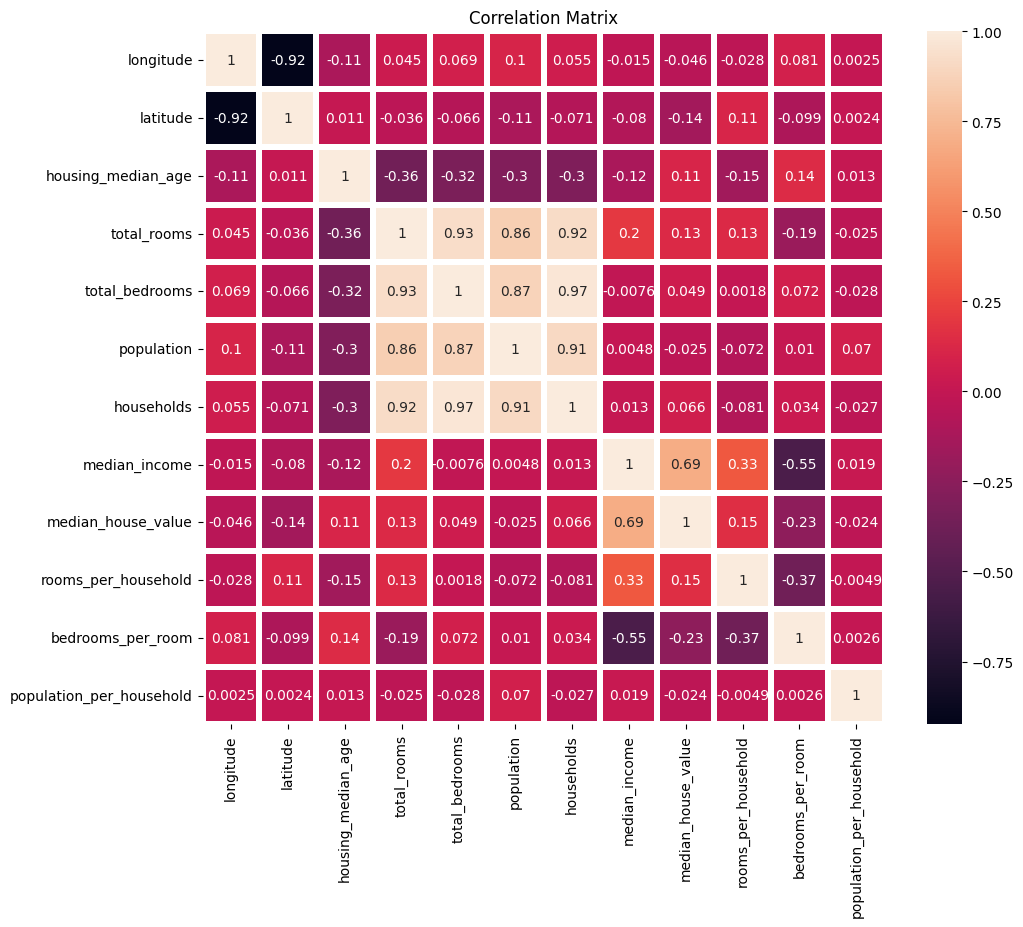

In [ ]:
# this part prepares a large box for the chart so the numbers aren't crowded
plt.figure(figsize=(11,9))

# we select only the columns with numbers because you cannot correlate text
data_num = data.select_dtypes(include='number')

#



# this creates a heatmap showing how much each feature affects the house price
# 'annot=True' puts the actual numbers inside the boxes so we can read the exact scores
sns.heatmap(data_num.corr(), annot=True, fmt='.2g', linewidths=3)

# adding a clear title to the top of the chart
plt.title('Correlation Matrix')

In [ ]:
# this groups the data by 'ocean_proximity' and adds up all the house prices for each area
# it helps us see which location type (like "INLAND" or "NEAR OCEAN") has the most total value
op_gr = data.groupby('ocean_proximity', as_index=False)['median_house_value'].sum()

# this turns the results into a clean table (DataFrame) so we can work with it easily
df_op_gr = pd.DataFrame(op_gr)

# this displays the final table showing the total house value for each category
df_op_gr

ocean_proximity  median_house_value
0       <1H OCEAN        2.193410e+09
1          INLAND        8.176001e+08
2          ISLAND        1.902200e+06
3        NEAR BAY        5.935962e+08
4      NEAR OCEAN        6.629955e+08

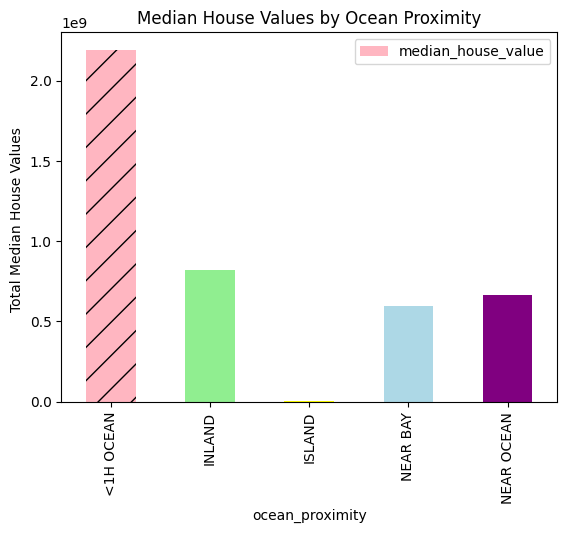

In [ ]:
# setting up a list of colors to make each bar look different
colors = [ 'lightpink','lightgreen' , 'yellow', 'lightblue','purple']
num_bars = len(df_op_gr)

#
# creating a bar chart to compare total house values across different locations
bars = df_op_gr.plot.bar(x='ocean_proximity', y='median_house_value', color=colors[:num_bars])

# finding the highest value so we can make that specific bar stand out
max_value = df_op_gr['median_house_value'].max()
max_index = df_op_gr['median_house_value'].idxmax()

# this loop checks every bar; if it is the tallest one, it adds a pattern (hatch) to it
for patch in bars.patches:
    if patch.get_height() == max_value:
        patch.set_hatch('/')  # adds diagonal lines to the highest bar

# setting the names on the bottom and the label on the left side
plt.xticks(ticks=range(len(df_op_gr)), labels=df_op_gr['ocean_proximity'])
plt.ylabel('Total Median House Values ')

# adding a title and showing the final chart on the screen
plt.title('Median House Values by Ocean Proximity')
plt.show()

In [ ]:
data.groupby('ocean_proximity')[['median_income']].sum()

median_income
ocean_proximity               
<1H OCEAN           38651.5100
INLAND              21022.1353
ISLAND                 13.7221
NEAR BAY             9555.9061
NEAR OCEAN          10647.3760

In [ ]:
# setting up a custom list of colours to make the bars look distinct
colors = [ 'lightpink','lightgreen' , 'yellow', 'lightblue','purple']

# grouping the data by location and adding up all the income values for each area
# this shows us which areas have the highest total wealth
gr = data.groupby('ocean_proximity', as_index=False)['median_income'].sum()

# putting that grouped data into a clean table format
df = pd.DataFrame(gr)

#
# creating an interactive bar chart using Plotly
# we assign different colours to each location type to make it easy to read
fig = px.bar(df, x='ocean_proximity', y='median_income', color='ocean_proximity',
             color_discrete_sequence=colors,
             title=' Median Income by Ocean Proximity ')

# showing the interactive chart on the screen
fig.show()

In [ ]:
gr=data.groupby('ocean_proximity')[['median_income','median_house_value']].sum()
gr

median_income  median_house_value
ocean_proximity                                   
<1H OCEAN           38651.5100        2.193410e+09
INLAND              21022.1353        8.176001e+08
ISLAND                 13.7221        1.902200e+06
NEAR BAY             9555.9061        5.935962e+08
NEAR OCEAN          10647.3760        6.629955e+08

In [ ]:
#
# this creates an interactive scatter plot to compare bedrooms and total rooms
# we set the size of the dots based on the population, so larger dots mean more people
fig = px.scatter(data, x='total_bedrooms', y='total_rooms', size='population',
                 hover_data=['housing_median_age','median_house_value','ocean_proximity'],
                 title='Total bedrooms VS Total rooms')

# showing the chart; you can hover your mouse over the dots to see extra details like house age and price
fig.show()

In [ ]:
#
# this creates an interactive scatter plot to see how population relates to the number of homes
# the size of the dots changes based on the population (bigger dots = more people)
fig = px.scatter(data, x='population', y='households', size='population',
                 hover_data=['housing_median_age','median_house_value','ocean_proximity'],
                 title='Population VS House holds')

# showing the chart; you can move your mouse over dots to see specific district details
fig.show()

In [ ]:
fig =px.scatter(data, x='longitude', y='latitude',size='median_house_value',hover_data=['housing_median_age','population','ocean_proximity'] ,title='Longitude VS Latitude')
fig.show()

In [ ]:
colors = [ 'lightpink','lightgreen' , 'yellow', 'lightblue','purple']
gr = data['ocean_proximity'].value_counts()
df = gr.reset_index()
df.columns = ['ocean_proximity', 'count']
fig = px.bar(df, x='ocean_proximity', y='count',color='ocean_proximity',
             color_discrete_sequence=colors,
             title=' Ocean Proximity Values Count')
fig.show()



In [ ]:
# grouping the data to see the total number of people living in each ocean area
gr_opp = data.groupby('ocean_proximity', as_index=False)['population'].sum()
df_gr_opp = pd.DataFrame(gr_opp)

# setting up colours and 'pulling out' the slices (explode) to make the chart look clear
colors = [ 'lightpink','lightgreen' ,'blue','lightblue','plum']
explode = [0.1, 0.1, 0.1, 0.1, 0.2]

#
# creating an interactive pie chart to show which areas are the most crowded
fig = go.Figure(data=[go.Pie(
    labels=df_gr_opp['ocean_proximity'],
    values=df_gr_opp['population'],
    pull=explode,
    marker=dict(colors=colors)
)])

# adding the title and showing the final interactive pie chart
fig.update_layout(title='Total Population by Ocean Proximity')
fig.show()

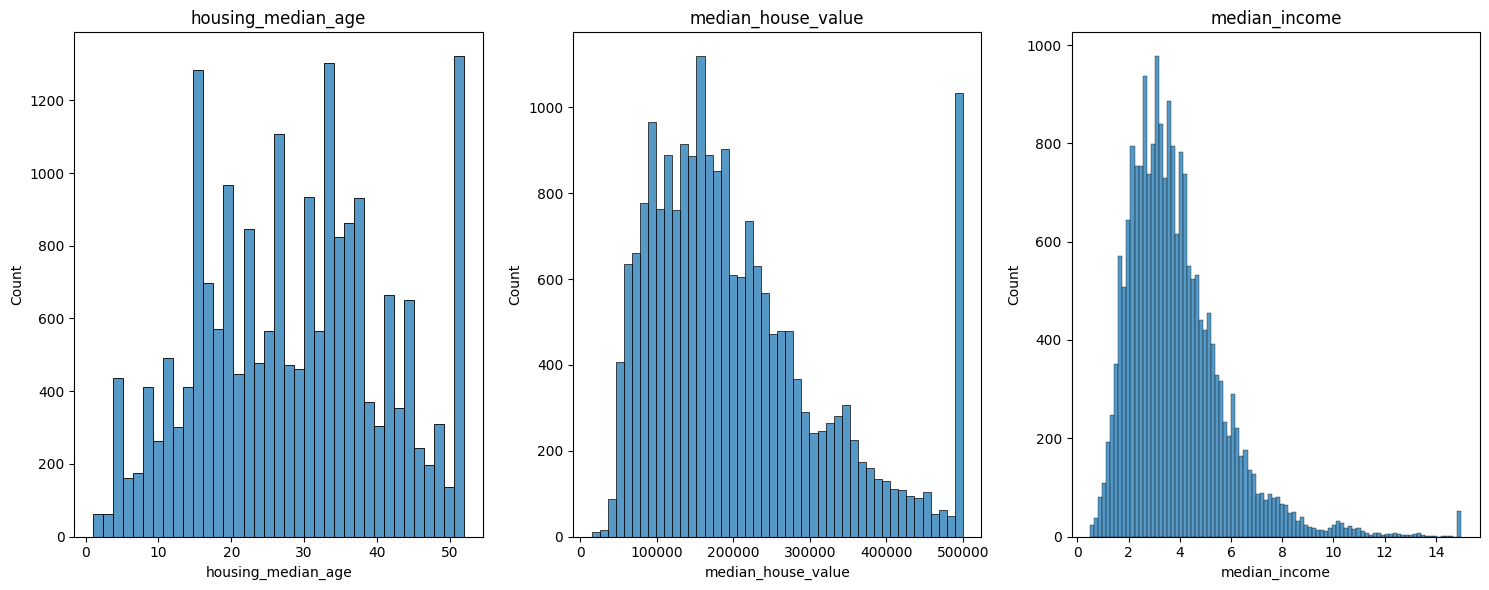

In [ ]:
# selecting three key columns to look at their distribution
df = data[['housing_median_age', 'median_house_value', 'median_income']]

#
# setting the size of the overall figure
plt.figure(figsize=(15, 6))

# looping through the three columns to create a subplot for each
for i, col in enumerate(df.columns):
    # creating a 1x3 grid of charts
    plt.subplot(1, 3, i + 1)

    # drawing a histogram to see how the data is spread out (frequency)
    sns.histplot(data=df, x=col)

    # labeling each chart with its column name
    plt.title(col)

# adjusting the spacing so the charts don't overlap and showing the result
plt.tight_layout()
plt.show()

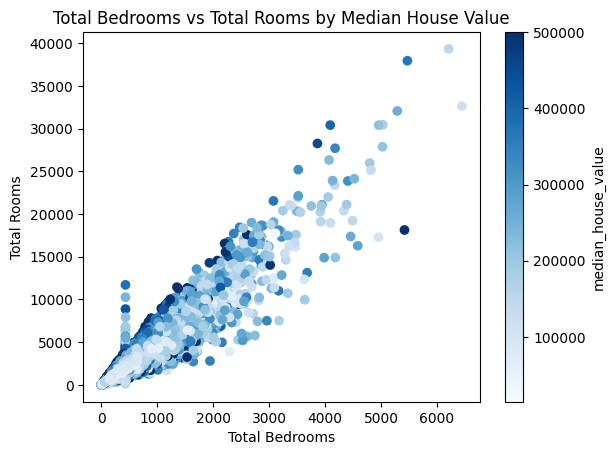

In [ ]:
#
# mapping bedrooms on X and total rooms on Y
# 'c' sets the colour based on house price, while 'cmap' applies the Blue gradient
scatter = plt.scatter(data['total_bedrooms'], data['total_rooms'], c=data['median_house_value'], cmap='Blues')

# adding descriptive labels and a title so the chart actually makes sense
plt.title('Total Bedrooms vs Total Rooms by Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')

# creating a side legend (colour bar) to show what the different shades of blue represent
cbar = plt.colorbar(scatter)
cbar.set_label('median_house_value')

plt.show()

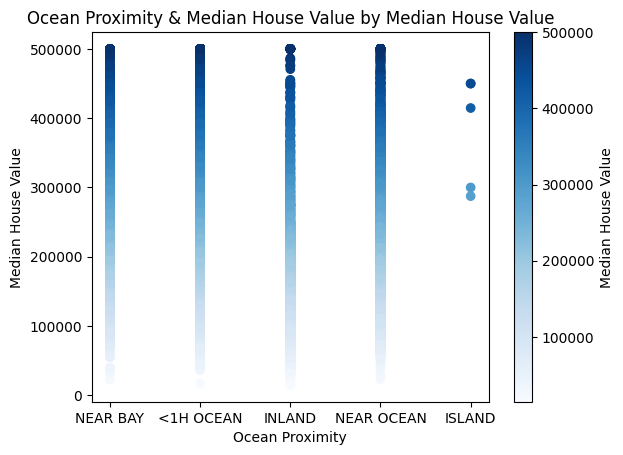

In [ ]:
# [Image of a scatter plot showing Ocean Proximity vs House Value]
# mapping the categorical location on the X-axis and the price on the Y-axis
# 'c' is again set to the house value, which is redundant here since the height already shows the price
scatter = plt.scatter(data['ocean_proximity'], data['median_house_value'], c=data['median_house_value'], cmap='Blues')

# adding the labels for the axes and the main title
plt.title('Ocean Proximity & Median House Value by Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')

# adding a colour bar to show the price scale
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

plt.show()

# Data Transformation

In [ ]:

# Using One-Hot Encoding to fix the math and remove the text column automatically
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Check to ensure text is gone and new numbers are there
print("Encoding complete. New columns:", data.columns)

Encoding complete. New columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:
# Check the new "One-Hot" columns
# You should see columns like 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', etc.
print(data.columns[data.columns.str.contains('ocean')])

# Check the values of one of the new columns to be sure (it should be 0s and 1s)
print(data['ocean_proximity_INLAND'].value_counts())

Index(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
ocean_proximity_INLAND
False    14089
True      6551
Name: count, dtype: int64


In [ ]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       rooms_per_household  bedrooms_per_room  population_per_household  \
0                 6.984127           0.146591                  2.555556   
1                 6.238137           0.155797                  2.109842   
2                 8.288136           0.129516                  2.802260   
3                 5.817352           0.184458                  2.547945   
4                 6.281853           0.172096                  2.181467   
...                    ...                ...                       ...   
20635             5.045455           0.224625                  2.560606   
20636             6.114035           0.215208                  3.122807   
20637             5.205543           0.215173                  2.325635   
20638             5.329513           0.219892                  2.123209   
20639             5.254717           0.221185                  2.616981   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
20635                    True                   False   
20636                    True                   False   
20637                    True                   False   
20638                    True                   False   
20639                    True                   False   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                          True                       False  
1                          True                       False  
2                          True                       False  
3                          True                       False  
4                          True                       False  
...                         ...                         ...  
20635                     False                       False  
20636                     False                       False  
20637                     False                       False  
20638                     False    

In [ ]:
# This looks for all columns that start with 'ocean_proximity_'
# and calculates their correlation with the house value.
ocean_cols = [col for col in data.columns if 'ocean_proximity_' in col]

for col in ocean_cols:
    correlation = data['median_house_value'].corr(data[col])
    print(f"Correlation between {col} and House Value: {correlation:.4f}")

Correlation between ocean_proximity_INLAND and House Value: -0.4849
Correlation between ocean_proximity_ISLAND and House Value: 0.0234
Correlation between ocean_proximity_NEAR BAY and House Value: 0.1603
Correlation between ocean_proximity_NEAR OCEAN and House Value: 0.1419


# Split Data Target & Features


In [ ]:
# Re-define X with the new encoded columns
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Re-split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Check the shape - if you see roughly 16512 rows and 12 or 13 columns, YOU ARE GOOD.
print(x_train.shape)

(16512, 15)


# Split Train & Test data

In [ ]:
# splitting the dataset into training and testing sets
# 80% of the data goes to training the model (x_train, y_train)
# 20% is held back to test how well the model actually performs (x_test, y_test)
# 'random_state=0' ensures that the split is exactly the same every time you run it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# checking the dimensions of our data subsets
# this confirms how many rows (districts) and columns (features) are in each set
# it is a crucial sanity check to ensure the 80/20 split worked correctly
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 15), (4128, 15), (16512,), (4128,))

# Build Model

In [ ]:
lin_reg=LinearRegression()
rf_reg=RandomForestRegressor()

In [ ]:
# Initialising empty lists to store the performance metrics for our models
# We will use these later to compare which algorithm performed better
columns = ['LinearRegression', 'RandomForestRegressor']
train_score = []  # To store how well the model learned the training data
rec_score = []    # To store the R-squared (accuracy) score on test data
mae_val = []      # To store Mean Absolute Error (average $ error)
mse_val = []      # To store Mean Squared Error

In [ ]:
# this function automates the training and testing for any model we pass in
def all(model):
    # training the model using our 80% training data
    model.fit(x_train, y_train)

    # using the trained model to predict house prices for the remaining 20%
    y_pred = model.predict(x_test)

    # calculating the scores to see how well the model performed
    accuracy_train = model.score(x_train, y_train) * 100
    recall_result = r2_score(y_pred, y_test) * 100
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # saving the results into our lists for later comparison
    train_score.append(accuracy_train)
    rec_score.append(recall_result)
    mse_val.append(mse)
    mae_val.append(mae)

    # printing the performance details to the screen
    print('Accuracy after train the model is :', accuracy_train)
    print('Result recall score is :', recall_result)
    print('Mean Squared Error :', mse)
    print('Mean Absolute Error :', mae)

In [ ]:
all(lin_reg)

Accuracy after train the model is : 65.16499022471459
Result recall score is : 43.598058256728734
Mean Squared Error : 4693093481.148634
Mean Absolute Error : 49319.86719723447


In [ ]:
all(rf_reg)

Accuracy after train the model is : 97.39590200329921
Result recall score is : 76.55607332090439
Mean Squared Error : 2415233684.2298946
Mean Absolute Error : 32156.6971124031


# Models Performance Comparison

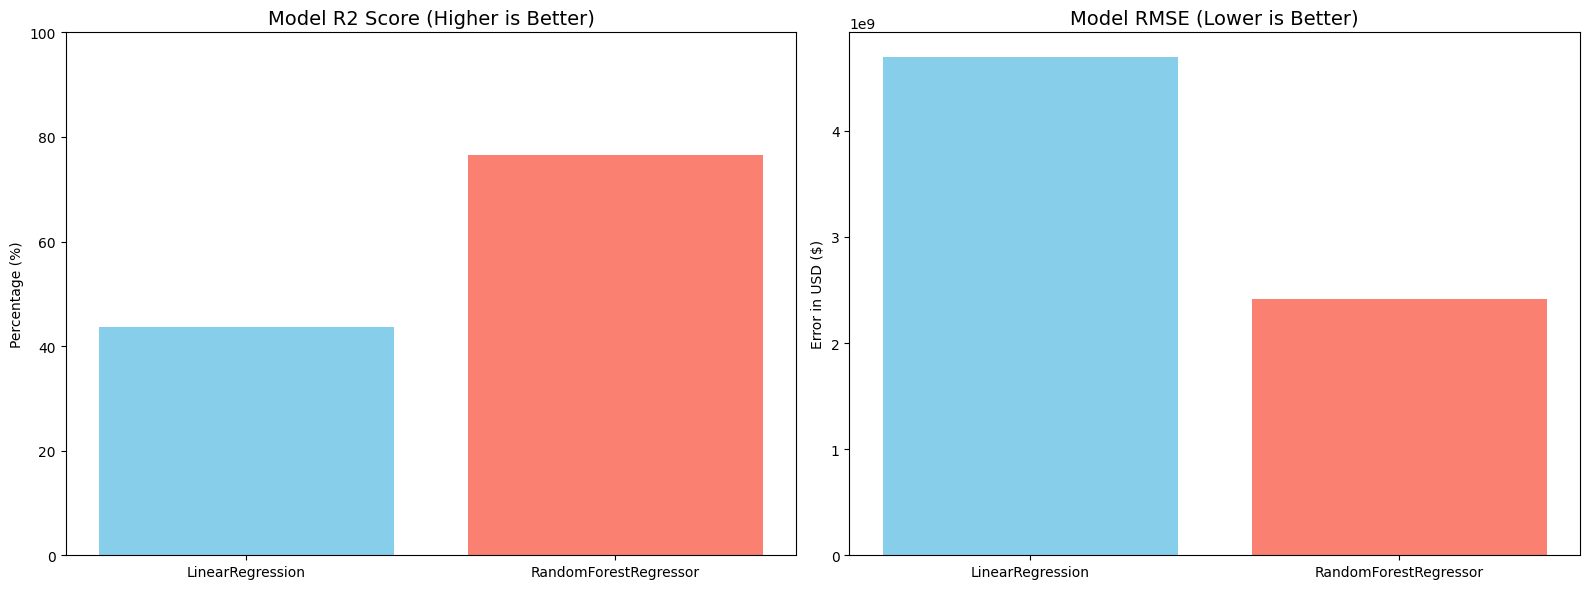

In [ ]:
import matplotlib.pyplot as plt

# comparison: R2 and RMSE separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: R2 Score (Percentage)
ax1.bar(columns, rec_score, color=['skyblue', 'salmon'])
ax1.set_title('Model R2 Score (Higher is Better)', fontsize=14)
ax1.set_ylabel('Percentage (%)')
ax1.set_ylim(0, 100)

# Plot 2: RMSE (Error in Dollars)
#
ax2.bar(columns, mse_val, color=['skyblue', 'salmon'])
ax2.set_title('Model RMSE (Lower is Better)', fontsize=14)
ax2.set_ylabel('Error in USD ($)')

plt.tight_layout()
plt.show()

<div style="text-align:center; font-size:14px; border: 2px solid #333; border-radius: 8px; padding: 20px; margin-bottom: 20px; background-color:#f8d7da; font-family: 'Montserrat', sans-serif; font-weight: bold; color: #333;">

  <h1 style="font-size: 24px; margin-bottom: 15px; color: white;">Performance Summary: Random Forest Regressor vs. Linear Regression</h1>

  <div style="text-align:left; margin: 0 auto; max-width: 600px;">
    <h2 style="font-size: 18px; margin-bottom: 10px; color: white;">Random Forest Regressor Outperforms Linear Regression:</h2>
    <ul style="list-style-type: none; padding: 0; margin: 0;">
      <li style="margin-bottom: 10px;">
        <strong>Train Score:</strong> Random Forest Regressor performs better
      </li>
      <li style="margin-bottom: 10px;">
        <strong>Recall Score:</strong> Random Forest Regressor performs better
      </li>
      <li style="margin-bottom: 10px;">
        <strong>Mean Squared Error (MSE):</strong> Random Forest Regressor performs better (lower MSE is preferred)
      </li>
      <li style="margin-bottom: 10px;">
        <strong>Mean Absolute Error (MAE):</strong> Random Forest Regressor performs better (lower MAE is preferred)
      </li>
    </ul>
  </div>

</div>


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# 2. Re-run  evaluation (using the corrected function)
#
train_score, rec_score, mae_val, mse_val = [], [], [], []

def evaluate(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # R2 Score (Accuracy of fit)
    r2 = r2_score(y_test, y_pred)
    # RMSE (Real-world error in Dollars)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    train_score.append(model.score(x_train, y_train) * 100)
    rec_score.append(r2 * 100)
    mse_val.append(rmse) # Switching to RMSE for better reporting
    mae_val.append(mae)

    print(f"--- {type(model).__name__} ---")
    print(f"R2 Score: {r2*100:.2f}%")
    print(f"RMSE (Avg Error): ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}\n")

evaluate(lr)
evaluate(rf)

--- LinearRegression ---
R2 Score: 64.01%
RMSE (Avg Error): $68506.16
MAE: $49319.87

--- RandomForestRegressor ---
R2 Score: 81.45%
RMSE (Avg Error): $49183.11
MAE: $32230.99



Data Visualisation


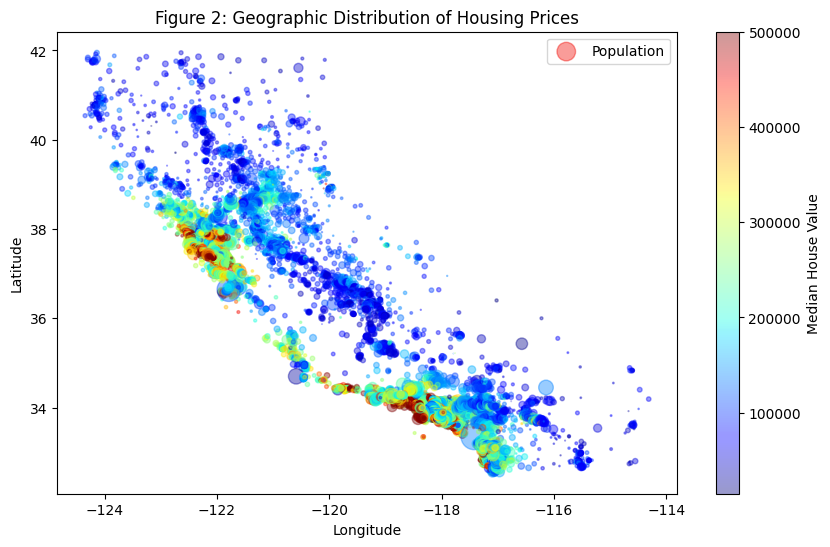

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- FIGURE 2: GEOGRAPHIC HEATMAP ---
plt.figure(figsize=(10, 6))
# 'c' is the color (price), 's' is the size (population)
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            c=data['median_house_value'], cmap='jet', s=data['population']/100, label='Population')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Figure 2: Geographic Distribution of Housing Prices')
plt.legend()
plt.show()


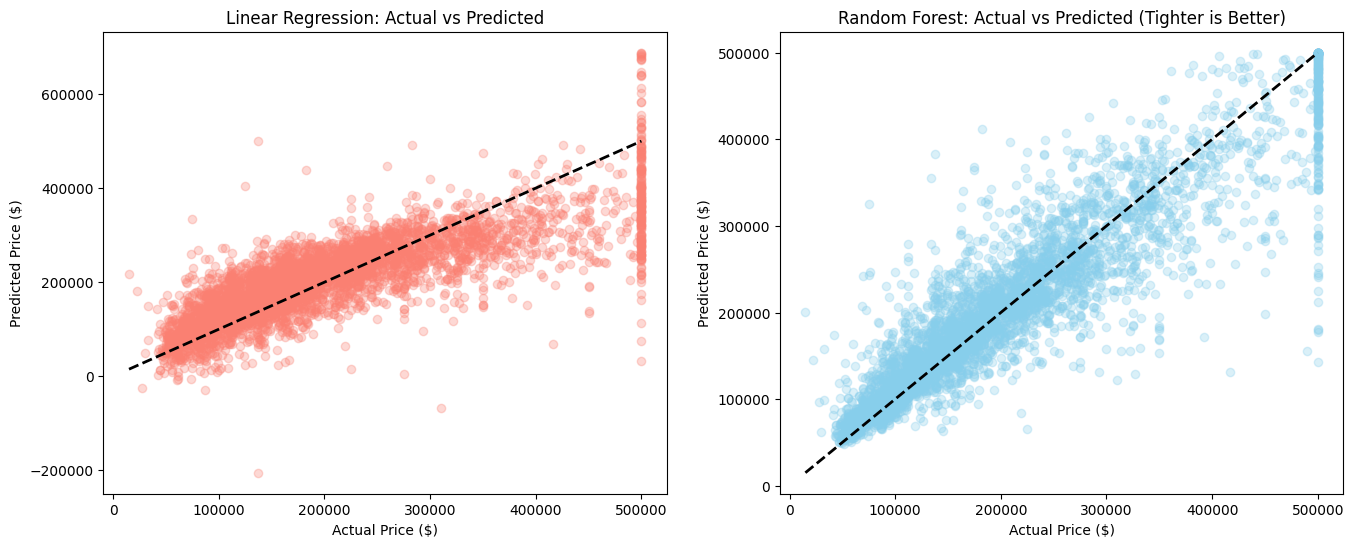

In [ ]:

# --- FIGURE 3: ACTUAL VS PREDICTED (The Proof) ---
# We need to predict first to get the data for plotting
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression Plot
ax1.scatter(y_test, y_pred_lr, alpha=0.3, color='salmon')
# Draw the "perfect" line
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax1.set_title('Linear Regression: Actual vs Predicted')
ax1.set_xlabel('Actual Price ($)')
ax1.set_ylabel('Predicted Price ($)')

# Random Forest Plot
ax2.scatter(y_test, y_pred_rf, alpha=0.3, color='skyblue')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax2.set_title('Random Forest: Actual vs Predicted (Tighter is Better)')
ax2.set_xlabel('Actual Price ($)')
ax2.set_ylabel('Predicted Price ($)')

plt.show()

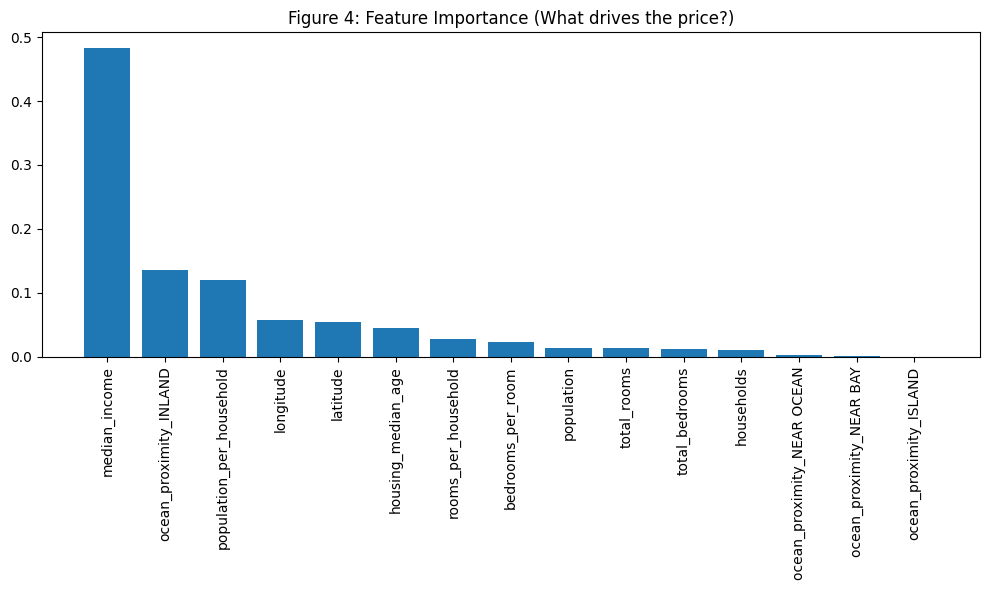

In [ ]:


# --- FIGURE 4: FEATURE IMPORTANCE ---
importances = rf.feature_importances_
# Sort them to make the chart readable
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Figure 4: Feature Importance (What drives the price?)')
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.tight_layout()
plt.show()